# Visualizations
Primary uses for data visualization:
- to explore, reveal and communicate data effectively
- provide the reader with important, meaningful, and useful insight

Tufte's Graphical Excellence:
Excellence in statistical grahics consists of complex ideas communicated with clarity, precision and <br>
efficiency. 

__Graphical display should:__
- show the data
- induce the viewer to think about the substance rather than about methodology, graphic design, the technology of grahpic production, or something else
- avoid distorting what the data have to say
- present many numbers in a small space
- make large number sets coherent
- encourage the eye to compare different pieces of data
- reveal the data at several levels of detail, from a broad overview to the fine structure
- serve a reasonable clear purpose: description, exploration, tabulation, or decoration
- be closely integrated with the statistical and verbal descriptions of  a data set. 

__Design for the human brain:__
- Length on an aligned scale may be the best option to compare numbers accurately
- Color hue is a good way of encoding categorical data. 
- Vertical columns often work well when few items are being compared, while horizontal bars may be a better option when there are many items to compare
- Sacrosanct rule with bar and column charts: Because they rely on the length of the bars to encode data, you must start the bars at zero.



# imports

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

gapminder = pd.read_csv('data/gapminder.csv')

Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 15 ("                               'fc4f30', ")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 16 ("                               'e5ae38',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 17 ("                               '6d904f',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 18 ("                               '8b8b8b',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 19 ("                               '810f7c'])")
Bad value in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 14 ("axes.prop_cycle: cycler(color=['008fd5', "): Key axes.prop_cycle: 'cycler(color=['008fd5',' is not a valid cycler construction: unexpected EOF while parsing (<unknown>, 

# rcParams
You can dynamically change the default rc (runtime configuration) settings in a python script or <br>
interactively from the python shell. All rc settings are stored in a dictionary-like variable called <br>
matplotlib.rcParams, which is global to the matplotlib package.<br>

In [162]:
# set fonts in a family
plt.rcParams['font.sans-serif'] = [ 'Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant' ]
print(plt.rcParams['font.sans-serif'])

['Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant']


In [32]:
plt.rcParams['figure.figsize'] = (10, 8)  # set figure size
plt.rcParams['image.interpolation'] = 'nearest'  # set interpolation
plt.rcParams['font.sans-serif'] = 'Nimbus Sans'  # set font
plt.rcParams['font.size'] = 14  # set font size

# Line Chart
- We can make multiple calls to plt.plot to show multiple series on the same chart

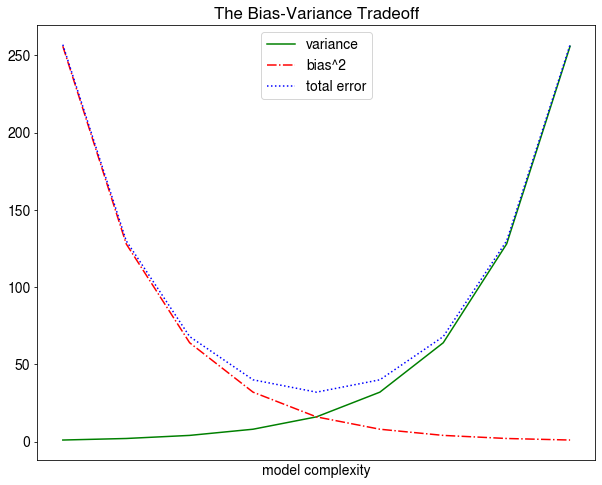

In [33]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line

# Because we've assigned labels to each series, we can get a legend for free 

plt.legend(loc=9) # loc=9 means "top center"
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## Uncomparable axes
-  the second plot  more accurately shows that most of the variation occurs on test 2.

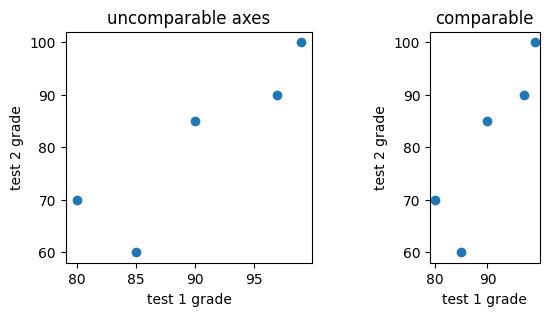

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

ax[0].scatter(test_1_grades, test_2_grades)
ax[0].set_title("uncomparable axes")
ax[0].set_xlabel("test 1 grade")
ax[0].set_ylabel("test 2 grade")

ax[1].scatter(test_1_grades, test_2_grades)
ax[1].set_title("comparable")
ax[1].set_aspect('equal')
ax[1].set_xlabel("test 1 grade")
ax[1].set_ylabel("test 2 grade")

plt.show()

# scatterplot
- visualizing the relationship between two paired sets of data
- trendline with numpy ployfit() & poly1d()

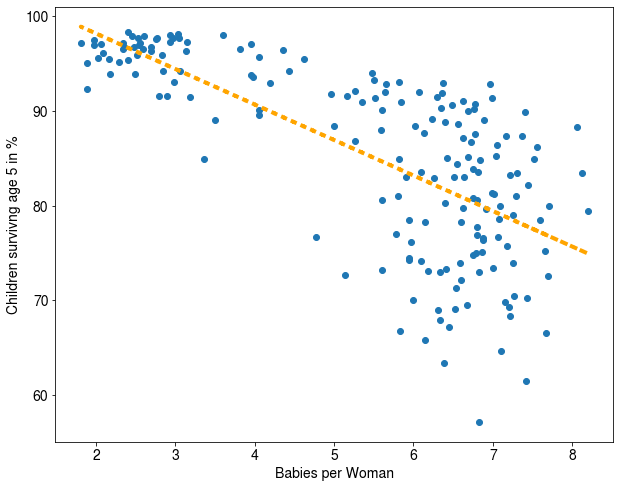

In [58]:
x = gapminder[gapminder.year == 1965]['babies_per_woman']
y = gapminder[gapminder.year == 1965]['age5_surviving']

# add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),  color="orange", linewidth=4, linestyle=":")

plt.scatter(x, y)
plt.xlabel('Babies per Woman')
plt.ylabel('Children survivng age 5 in %')
plt.show()

# bar plot
- show how some quantity varies among some discrete set of items

In [2]:
life_expectancy_dict = {}
for country in gapminder.country.unique():
    # function to fetch the mean life expactancy of all countries in the df after 2000
    life_expectancy = gapminder[(gapminder.country == country) & (gapminder.year > 2000)].life_expectancy.mean().round(1)
    life_expectancy_dict[country] = life_expectancy

In [3]:
from operator import itemgetter
lowest = dict(sorted(life_expectancy_dict.items(), key=itemgetter(1))[:1]) # get lowest in a dict ordered by values
highest = dict(sorted(life_expectancy_dict.items(), reverse=True, key=itemgetter(1))[:1])

In [4]:
lowest_and_highest = {**lowest, **highest} # join two dictionaries by unpacking them in a new dictionary
lowest_and_highest['Germany'] = life_expectancy_dict['Germany']
lowest_and_highest['USA'] = life_expectancy_dict['United States']
lowest_and_highest['Russia'] = life_expectancy_dict['Russia']

sorted_lowest_highest = dict(sorted(lowest_and_highest.items(), key=lambda item: item[1])) # another way to sort a dictionary
sorted_lowest_highest

{'Lesotho': 45.5, 'Russia': 67.9, 'USA': 78.2, 'Germany': 79.8, 'Japan': 82.4}

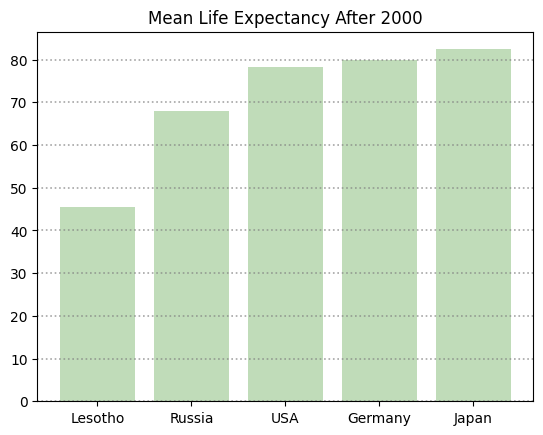

In [7]:
import matplotlib.pyplot as plt
plt.matplotlib.rc_file_defaults()  # reset defaults
plt.bar(sorted_lowest_highest.keys(),
        sorted_lowest_highest.values(),
        color='xkcd:fern',
        alpha=0.4)
plt.grid(color='grey', linestyle=':', linewidth=1.2, axis='y', alpha=0.7)
plt.title('Mean Life Expectancy After 2000')
plt.show()

## grouped bar chart!

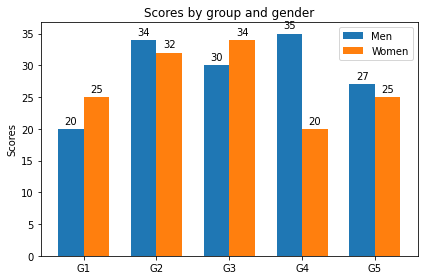

In [4]:
import matplotlib.pyplot as plt;
import numpy as np;

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, men_means, width, label='Men')
rects2 = ax.bar(x + width / 2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## barh - horizontal barplot

In [185]:
from matplotlib import rc
plt.matplotlib.rc_file_defaults()  # reset defaults
plt.rcParams['font.sans-serif'] = [ 'Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant' ]
plt.rcParams['font.sans-serif'] = 'Nunito Sans'  # set font
plt.rcParams['font.size'] = 11  # set font size

In [144]:
sorted_lowest_highest.keys()

dict_keys(['Lesotho', 'Russia', 'USA', 'Germany', 'Japan'])

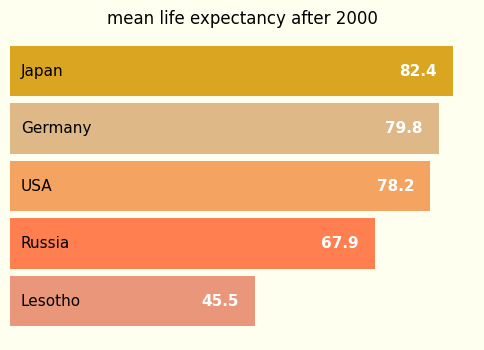

In [33]:
colors = {'Lesotho': 'darksalmon', 'Russia':'coral', 'USA':'sandybrown',
                'Germany': 'burlywood', 'Japan': 'goldenrod'}

fig, ax = plt.subplots(figsize=(6, 4), facecolor="ivory")  # figure color

ax.set_facecolor('ivory')  # axis color
ax.spines[:].set_visible(False)  # remove spines
ax.set_title('mean life expectancy after 2000', size=12)

ax.tick_params(labelbottom=False, bottom=False, labelleft=False,
        left=False, pad=10)  # manipulate ticks and labels


for k, v in sorted_lowest_highest.items():
    ax.barh(k, v, color=colors[k], height=0.87)

    ax.text(
        2,  # X location of text (with adjustment)
        k,  # Y location
        s=f'{k}',  # Required label with formatting
        va='center',  # Vertical alignment
        ha='left',  # Horizontal alignment
        color='k',  # Font colour and size
        size=11)

    ax.text(
        v - 3, k, s=f'{round(v ,1)}', va='center',
        ha='right', color='white', size=11, fontweight='bold')


## ax.bar_label
- in-built function that achieves the label in or next to the bars easier

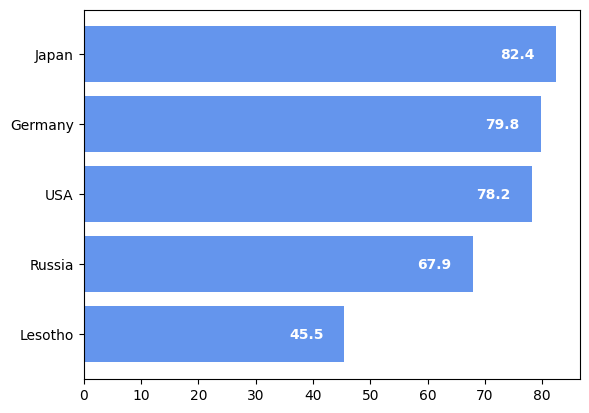

In [31]:
fig, ax = plt.subplots()

country = list(sorted_lowest_highest.keys())
life = list(sorted_lowest_highest.values())

bars = ax.barh(country, life, color='cornflowerblue')

ax.bar_label(bars, padding=-40, color='w', size=10, fontweight='bold');
plt.show()

## y-axis start
- **y-axis should always start at 0**, anything else can give a false impression

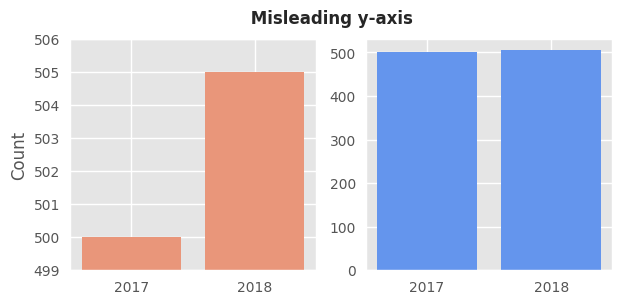

In [45]:
mentions = [500, 505]
years = [2017, 2018]
plt.style.use('ggplot')  # pick a style

fig, ax = plt.subplots(1, 2, figsize=(7,3))

fig.suptitle(' Misleading y-axis ', fontweight='bold', fontsize=12)

ax[0].bar(years, mentions, color='darksalmon')
ax[0].axis([2016.5, 2018.5, 499, 506])
ax[0].set_xticks(years)
ax[0].set_ylabel('Count')

ax[1].bar(years, mentions, color='cornflowerblue')
ax[1].set_xticks(years)
plt.show()

# styles

In [416]:
print(plt.style.available) # show available styles

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'scientific', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10', 'timeseries']


In [ ]:
import pandas as pd
gapminder = pd.read_csv('data/gapminder.csv')
india = gapminder[gapminder.country == 'India']

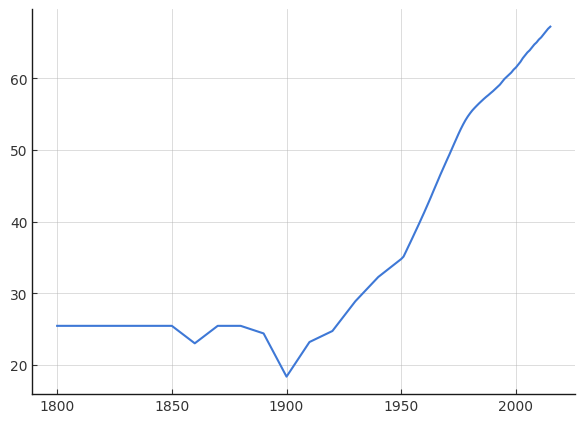

In [28]:
plt.style.use('timeseries')  # pick a style
plt.plot(india.year, india.life_expectancy);

/tmp/ipykernel_3123/2262466103.py:6: RuntimeWarning: invalid value encountered in power
  y2 = .1 * x**3 - x**2.1 + 3.2 * x + 1.5


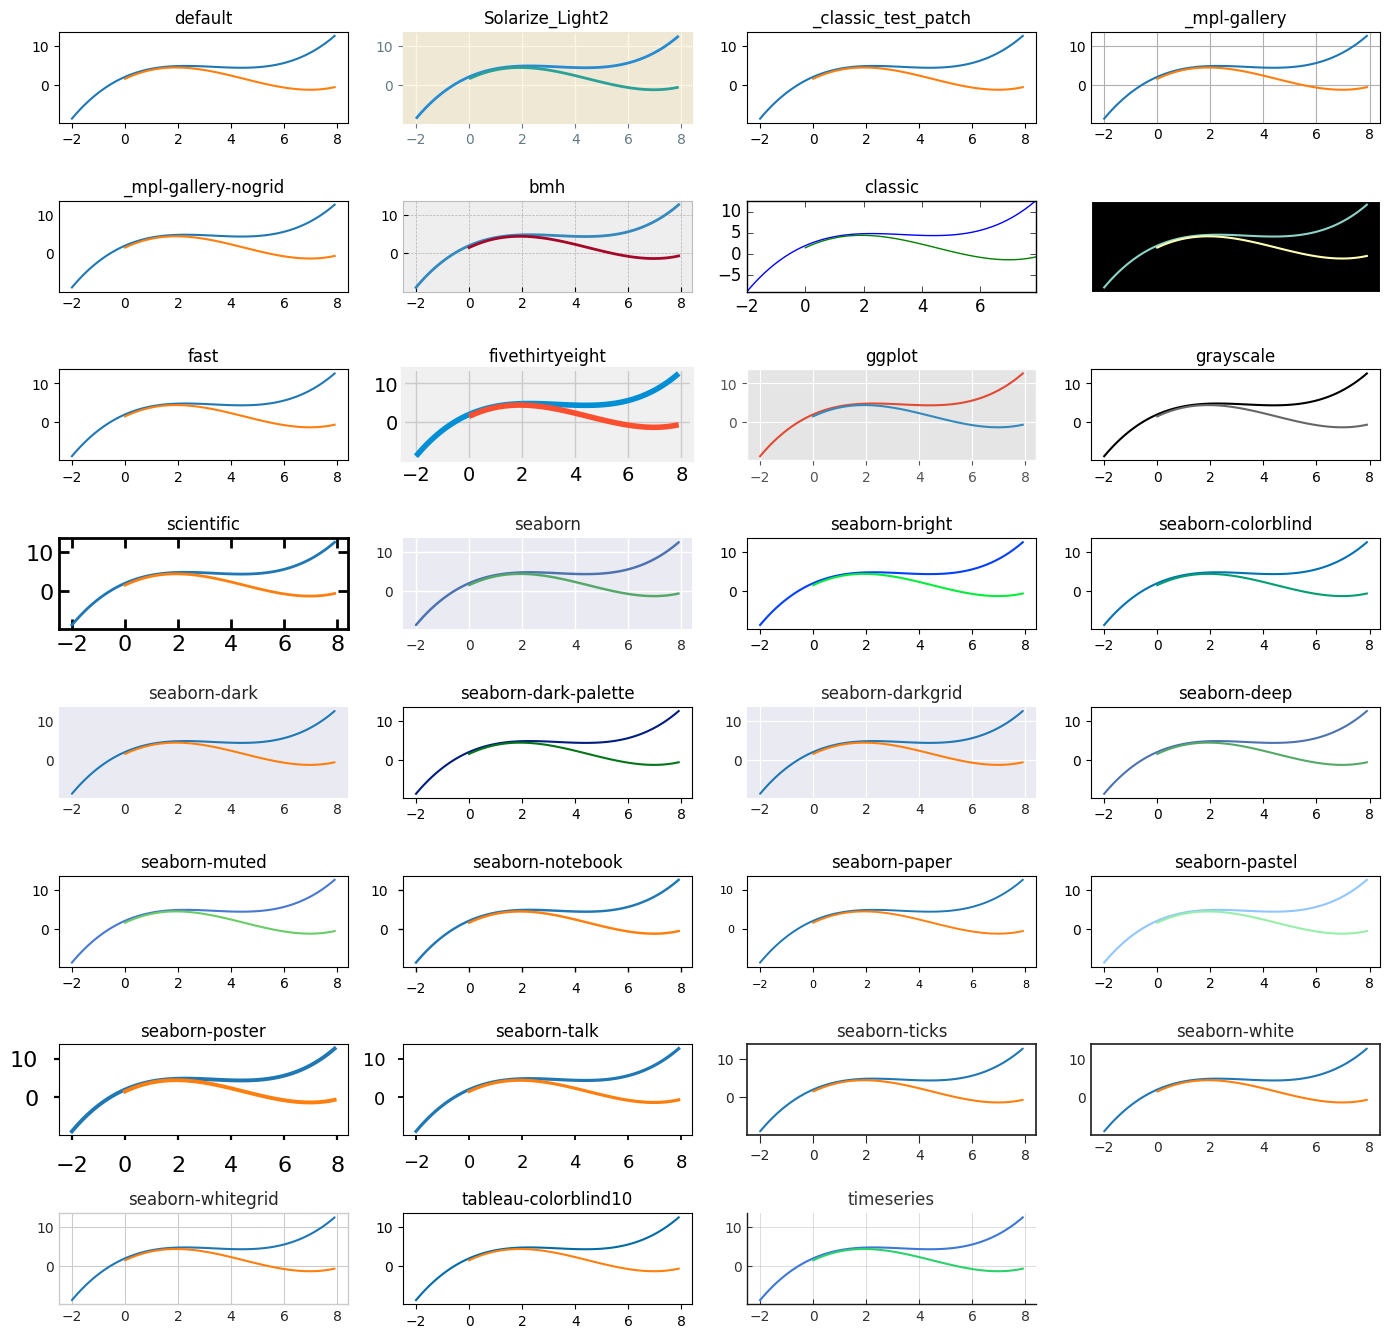

In [418]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.matplotlib.rc_file_defaults()  # reset defaults

x = np.arange(-2, 8, .1)
y = 0.1 * x**3 - x**2 + 3 * x + 2
y2 = 0.1 * x**3 - x**2.1 + 3.2 * x + 1.5

fig = plt.figure(dpi=100, figsize=(14, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(12, 4, i + 1)
        ax.plot(x, y)
        ax.plot(x, y2)
    ax.set_title(style)

In [ ]:
plt.style.library['seaborn-darkgrid']  # Showing the style settings

# histogram
-  To construct a histogram, the first step is to "**bin**" (or "bucket") the range of values—that is, divide the <br>
entire range of values into a series of intervals—and then count how many values fall into each interval. 
- If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency.
- A histogram may also be **normalized** to display "relative" frequencies.
- different ways to pick colors are implemented - see color

In [35]:
math_scores = [
    72, 41, 65, 63, 82, 63, 51, 57, 39, 63, 62, 68, 52, 76, 62, 73, 72, 73, 71,
    62, 76, 53, 71, 79, 77, 35, 65, 59, 58, 70, 73, 69, 59, 75, 73, 63, 65, 81,
    46, 59, 53, 71, 79, 80, 60, 60, 64, 40, 73, 75, 68, 58, 81, 65, 55, 62, 82,
    47, 85, 62, 39, 77, 82, 78, 57, 58, 72, 75, 65, 68, 86, 49, 39, 64, 54, 68,
    85, 77, 62, 53, 52, 76, 80, 84, 69, 61, 69, 65, 89, 97, 71, 61, 77, 40, 83,
    52, 78, 54, 64, 58, 100]

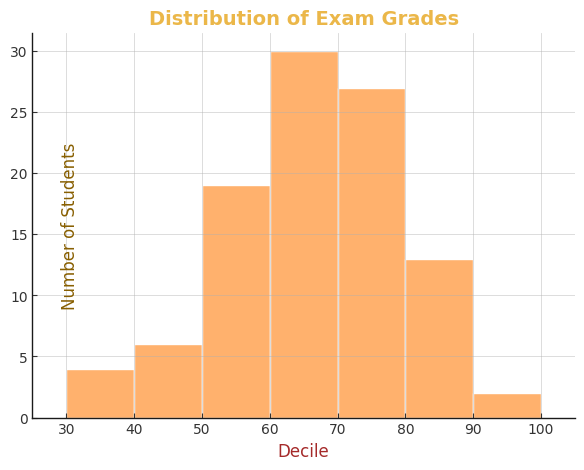

In [538]:
plt.matplotlib.rc_file_defaults()  # reset defaults
plt.rcParams['figure.figsize'] = (6, 5)  # set figure size
plt.style.use('timeseries') # pick a style

bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # specify the bin edges
plt.hist(
    x=math_scores,
    bins=bin_edges,
    range=[35, 105],
    facecolor='xkcd:apricot',  # https://xkcd.com/color/rgb/
    edgecolor='w',
    align='mid',
    color='teal')

plt.xlim(25, 105)
plt.xlabel("Decile", fontsize=12, color='brown')
plt.ylabel("Number of Students", fontsize=12, labelpad=-50, color='xkcd:poo brown')
plt.title("Distribution of Exam Grades", fontsize=14, color='C3')
plt.show()

## bar bins
- custom histogram -- barplot with selfmade bins

Counter({60: 30, 70: 27, 50: 19, 80: 13, 40: 6, 30: 4, 90: 2})


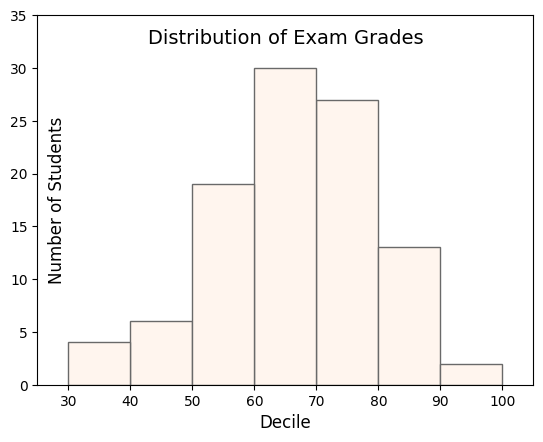

In [4]:
from collections import Counter
plt.matplotlib.rc_file_defaults()  # reset defaults

histogram = Counter(min(grade // 10 * 10, 90) for grade in math_scores)  # Bucket grades by decile, but put 100 in with the 90s
print(histogram)

plt.bar(
    x= [x + 5 for x in histogram.keys()], # Shift bars to the right by 5
    height=histogram.values(), # Give each bar its correct height
    width=10, # Give each bar a width of 10
    color='seashell',
    edgecolor='dimgray') # colored edges for each bar

plt.axis([25, 105, 0, 35]) # x-axis from 25 to 105, # y-axis from 0 to 35
plt.xlabel("Decile", fontsize=12)
plt.ylabel("Number of Students", fontsize=12, labelpad=-40)
plt.title("Distribution of Exam Grades", fontsize=14, y=0.9)
plt.show()


## bins
- bin edges can be defined or the number of bins is defined

You may derive the bins using the following formulas:
- n = number of observations
- Range = maximum value – minimum value
- no. of bins =  √n
- Width of bins =  range / bins

In [6]:
xmin = min(math_scores)
xmax = max(math_scores)
range = max(math_scores)-min(math_scores)
bins=len(math_scores)**0.5
bin_width=range/bins
print('min: ' + str(xmin))
print('max: ' + str(xmax))
print('range: ' + str(range))
print('bins: ' + str(bins))
print('bin width: ' + str(bin_width))

min: 35
max: 100
range: 65
bins: 10.04987562112089
bin width: 6.467741736364929


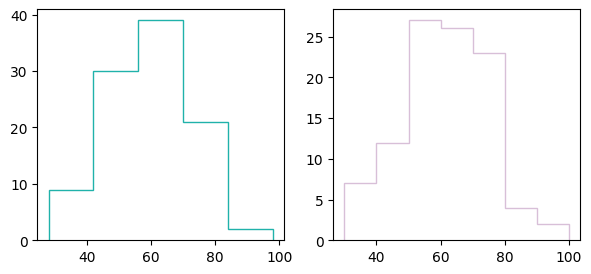

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

ax[0].hist( x=math_scores, bins=5, range=[35, 105], align='left', color='lightseagreen', histtype='step')

bin_edges= [35, 45, 55, 65, 75, 85, 95, 105]
ax[1].hist(x=math_scores, bins=bin_edges, align='left', color='thistle', histtype='step')

plt.show()

# Pie Chart
- Pie charts encode continuous variables primarily using the angles made in the center of the circle. 
- The Pie 100% is always divided and thus showing relative values
- Angles are harder to read than aligned bars. 
- Pie charts can be a complement to stacked bar charts (bothe holding the same info),  they involve comparison and composition
- Some suggest abandoning pie charts if there are any more than three parts to the whole, as they become very hard to read when there are many segments. ProPublica’s graphics style guide (https://github.com/propublica/guides/blob/master/news-apps.md) goes further, allowing pie charts with
two segments only.

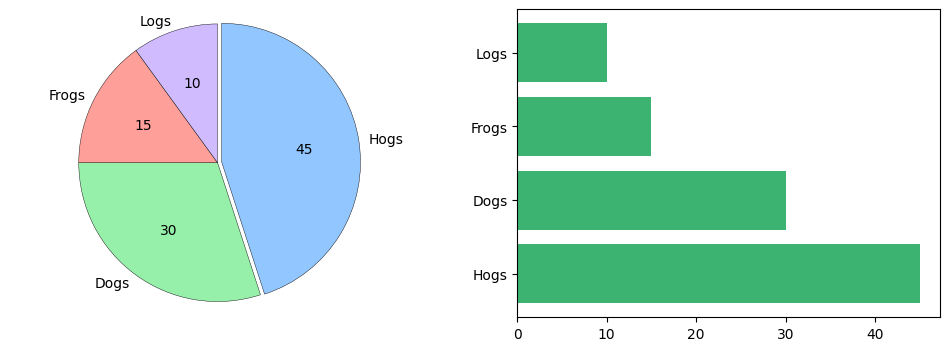

In [40]:
import matplotlib.pyplot as plt
plt.matplotlib.rc_file_defaults()  # reset defaults
plt.style.use('seaborn-pastel')  # pick a style


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Hogs', 'Dogs', 'Frogs', 'Logs'; sizes = [45, 30, 15, 10]
explode = (0.03, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%.0f',  # if you had percent the % is shown by writing '%.0f%%'
    counterclock=False,
    startangle=90,
    labeldistance=1.07,
    wedgeprops={
        "edgecolor": "k",
        'linewidth': 0.3,
        'antialiased': True
    })

ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax[1].barh(labels,sizes, color='mediumseagreen')

plt.show()

!['componenets of a matplotlib figure'](data/images/figure_components.png)

# frame & axis

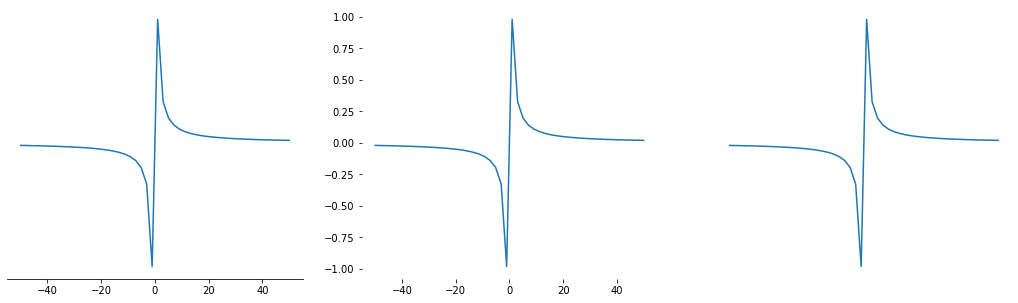

In [103]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

x = np.linspace(-50, 50)
y = x**-1

ax[1].plot(x, y)
ax[1].get_yaxis().set_visible(False)  #hide y-axis
#ax[0].get_xaxis().set_visible(False)  #hide x-axis
ax[1].spines[["left", "top", "right"]].set_visible(False) # hide spines

ax[1].plot(x, y)
ax[1].set_frame_on(False)  # hide frame left and bottom

ax[2].plot(x, y)
ax[2].set_axis_off()  # hide all axis 

# colors
- https://matplotlib.org/stable/tutorials/colors/colors.html
- "CN" color spec where 'C' precedes a number acting as an index into the default property cycle.

### Helper Function for colors

In [512]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted(
            (tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
            for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin / width, margin / height,
                        (width - margin) / width, (height - margin) / height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows - 0.5), -cell_height / 2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x,
                y,
                name,
                fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y - 9),
                      width=swatch_width,
                      height=18,
                      facecolor=colors[name],
                      edgecolor='0.7'))

    return fig

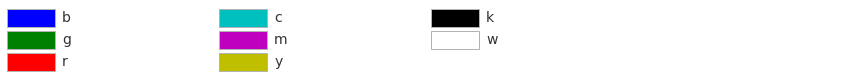

In [511]:
plot_colortable(mcolors.BASE_COLORS, sort_colors=False, emptycols=1); plt.show()

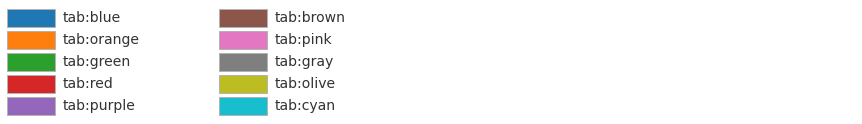

In [514]:
plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2); plt.show()

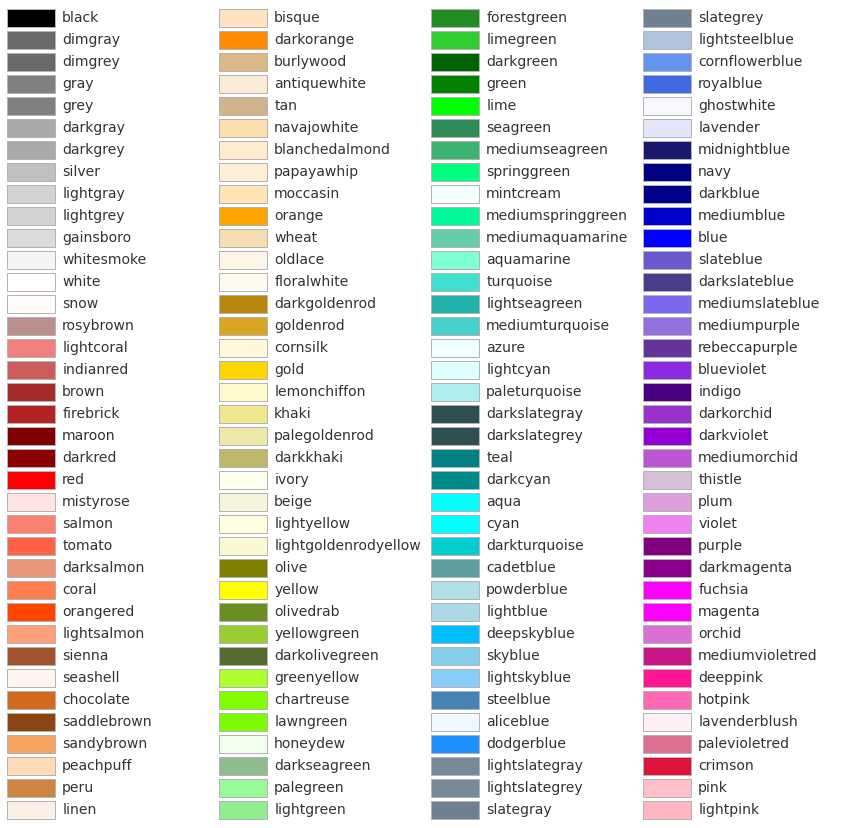

In [515]:
plot_colortable(mcolors.CSS4_COLORS); plt.show()

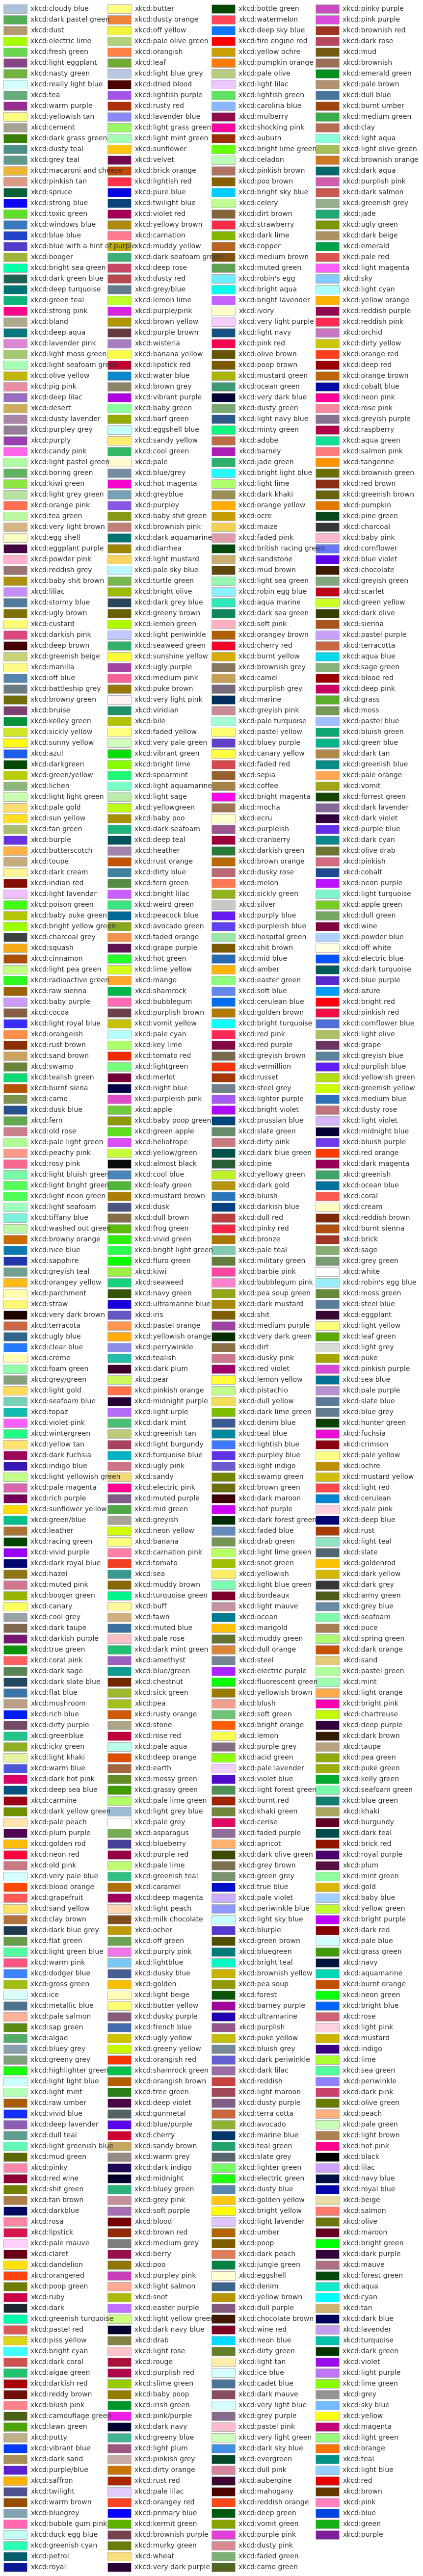

In [517]:
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
xkcd_fig.savefig("XKCD_Colors.png")  # https://xkcd.com/color/rgb/